In [1]:
import numpy as np
import sympy as sym
from scipy.optimize import LinearConstraint, Bounds, minimize

In [2]:
A, a1, a2, w1, w2, I = 28, 1/2, 0.2, 2, 4, 200

In [3]:
X, Y = sym.symbols('x y')
Q = A * X ** a1 * Y ** a2

In [4]:
Q

28*x**0.5*y**0.2

In [5]:
def F(data):
    x1, x2 = data
    return -(A * x1 ** a1 * x2 ** a2 - w1 * x1 - w2 * x2)

In [6]:
def gr(data):
    x, y = data

    der = np.zeros_like(data)
    der[0] = -eval(str(Q.diff(X)))
    der[1] = -eval(str(Q.diff(Y)))

    return der

In [7]:
print('dQ/dx:')
display(Q.diff(X))
print('dQ/dy:')
display(Q.diff(Y))

dQ/dx:


14.0*y**0.2/x**0.5

dQ/dy:


5.6*x**0.5/y**0.8

In [8]:
x0 = np.array([1.0, 1.0])
res1 = minimize(F, x0, jac=gr, options={'disp': True})

         Current function value: -125.605557
         Iterations: 6
         Function evaluations: 52
         Gradient evaluations: 40


In [9]:
print(f"Оптимальные значения: x: {res1.x[0]}, y: {res1.x[1]}")
print("Максимальное значение функции:", -res1.fun)

Оптимальные значения: x: 41.142187184568755, y: 43.52404373994064
Максимальное значение функции: 125.60555689555753


In [10]:
x_min = 0
y_min = 0
x_max, y_max = np.inf, np.inf

In [11]:
linear_constraint = LinearConstraint ([w1, w2], 0, I)
bounds = Bounds([x_min, y_min], [x_max, y_max])
x0 = np.array([1.0, 1.0])

In [12]:
res2 = minimize(F, x0, jac=gr, constraints=linear_constraint, bounds=bounds, options={'disp': True})

print(res2.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -202.78603572320867
            Iterations: 10
            Function evaluations: 10
            Gradient evaluations: 10
[71.42889132 14.28555434]


In [13]:
print(f"Оптимальные значения: x = {res2.x[0]}, y = {res2.x[1]}")
print("Максимальное значение функции:", -res2.fun)

Оптимальные значения: x = 71.4288913155059, y = 14.285554342232498
Максимальное значение функции: 202.78603572320867


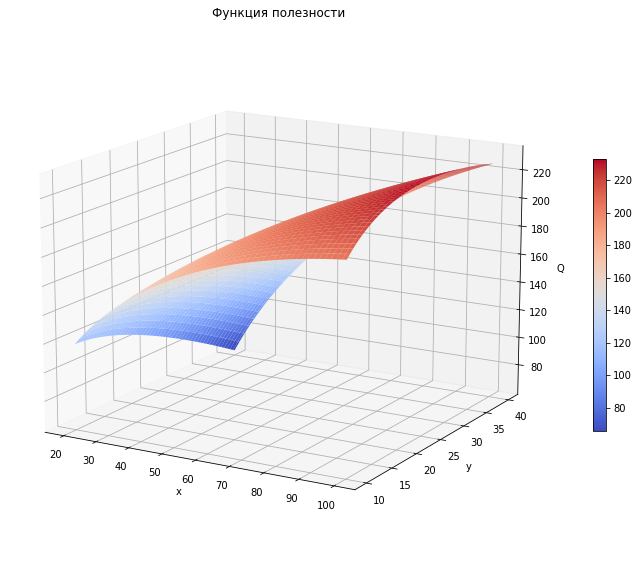

In [14]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots(figsize=(15,10), subplot_kw={"projection": "3d"})
ax.view_init(15, -60)

X = np.linspace(20, 100, 200)
Y = np.linspace(10, 40, 100)
X, Y = np.meshgrid(X, Y)
Z = -F(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5)
ax.set_title('Функция полезности')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Q')
plt.show()

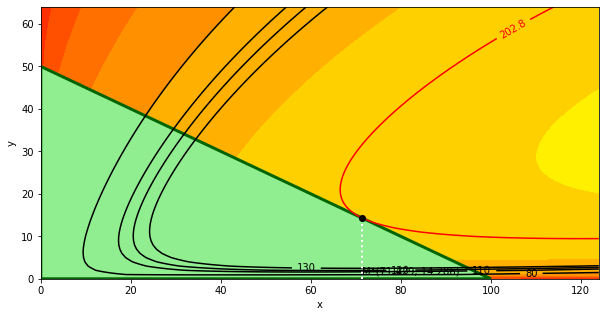

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

X = np.arange(0, 125, 1)
Y = np.arange(0, 65, 1)
X, Y = np.meshgrid(X, Y)
Z = -F(np.array([X,Y]))

ax.contourf(X, Y, Z, cmap='autumn')

adm = plt.Polygon([(x_min,y_min),(x_min, I/w2-w1*x_min/w2),(I/w1-w2*y_min/w1, y_min)], facecolor='lightgreen', edgecolor='darkgreen', alpha = 1, linewidth=3)
ax.add_patch(adm)

ax.set_xlabel('x')
ax.set_ylabel('y')

cs_m = ax.contour(X, Y, Z, levels=[-res2.fun], colors='red')
cs = ax.contour(X, Y, Z, levels=[80,110,120,130], colors='black')

plt.vlines(x=res2.x[0], ymin=0, ymax=res2.x[1], colors='white', ls=':', lw=2)
ax.plot(res2.x[0], res2.x[1], 'ko')
ax.text(res2.x[0], 1, f'M*({res2.x[0].round(3)}, {res2.x[1].round(3)})')

ax.clabel(cs)
ax.clabel(cs_m)

plt.show()